In [2]:
import pandas as pd

In [3]:
train = pd.read_csv("train.csv")
holdout = pd.read_csv("test.csv")
holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# %load functions.py
def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 

    Usage
    ------

    train process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [5]:
def process_df(df):
    df = process_missing(df)
    df = process_age(df)
    df = process_fare(df)
    df = process_titles(df)
    df = process_cabin(df)
    
    cols = ["Age_categories", "Fare_categories","Title", "Cabin_type", "Sex"]
    for col in cols:
        df = create_dummies(df, col)
    return df        

In [6]:
train = process_df(train)
holdout = process_df(holdout)

In [7]:
train[["SibSp","Parch"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SibSp   891 non-null    int64
 1   Parch   891 non-null    int64
dtypes: int64(2)
memory usage: 14.0 KB


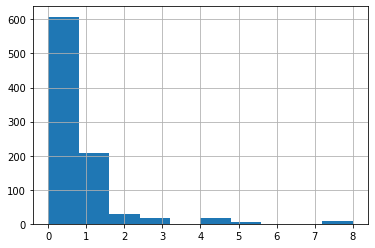

In [8]:
train["SibSp"].hist()

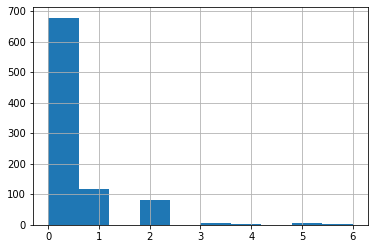

In [9]:
train["Parch"].hist()

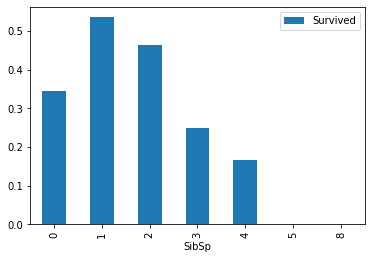

In [10]:
class_pivot = train.pivot_table(index="SibSp", values="Survived")
class_pivot.plot.bar()

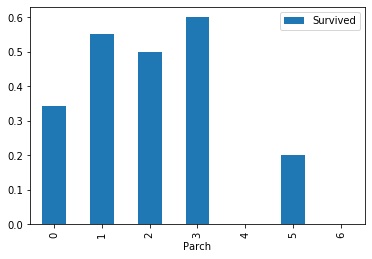

In [11]:
class_pivot = train.pivot_table(index="Parch", values="Survived")
class_pivot.plot.bar()

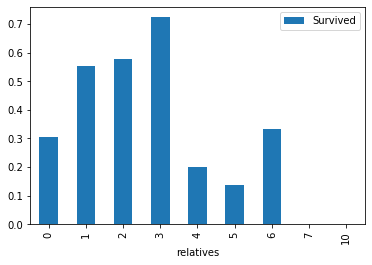

In [12]:
cols = ["SibSp", "Parch", "Survived"]
explore = train[cols].copy()
explore["relatives"] = explore["SibSp"]+explore["Parch"]

class_pivot = explore.pivot_table(index="relatives", values="Survived")
class_pivot.plot.bar()

In [13]:
def isalone(df):
    df["isalone"] = (df["SibSp"]+df["Parch"]==0).astype(int)
    return df

In [14]:
train = isalone(train)
holdout = isalone(holdout)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T,Cabin_type_Unknown,Sex_female,Sex_male,isalone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,1,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,0,0,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,1,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,1,0,1,1


## Feature selection

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

def select_features(df):
    n_col = len(df.columns) 
    # Remove non numeric values
    df = df.select_dtypes(include='number')
    
    # remove columns containing null values
    df = df.dropna(axis=1)
    print("{} columns dropped.".format(n_col-len(df.columns)))
    
    # all_X and all_y definition
    all_X = df.drop(["PassengerId","Survived"], axis=1)
    all_y = df["Survived"]
    
    rf = RandomForestClassifier(random_state=1)
    selector = RFECV(rf, cv=10)
    selector.fit(all_X, all_y)
    print(selector.n_features_)
    return all_X.columns[selector.support_]

opt_columns = select_features(train)
print(opt_columns)

8 columns dropped.


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

def select_model(df, features_list):
    all_X = df[features_list]
    all_y = df["Survived"]
    
    dict_list = [
        {
            "name":"LogisticRegression",
            "estimator": LogisticRegression(max_iter=1000),
            "hyperparameters":
                {
                    "solver": ["newton-cg", "lbfgs", "liblinear"]
                }
        },
        {
            "name":"KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,20,2),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["ball_tree", "kd_tree", "brute"],
                    "p": [1,2]
                }
        },
        {
            "name":"RandomForestClassifier",
            "estimator": RandomForestClassifier(),
            "hyperparameters":
                {
                    "n_estimators": [4, 6, 9],
                    "criterion": ["entropy", "gini"],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]
                }
        }
    ]
    for dic in dict_list:
        grid = GridSearchCV(dic["estimator"], dic["hyperparameters"], cv=10)
        grid.fit(all_X, all_y)
        dic["best_score"] = grid.best_score_
        dic["best_params"] = grid.best_params_
        dic["best_estimator"] = grid.best_estimator_
        print("Best {} scored {} with these params : {}".format(dic["name"], dic["best_score"], dic["best_params"]))
    return dict_list

best_models = select_model(train, opt_columns)

Best LogisticRegression scored 0.8204619225967541 with these params : {'solver': 'newton-cg'}
Best KNeighborsClassifier scored 0.7767041198501874 with these params : {'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best RandomForestClassifier scored 0.8451685393258426 with these params : {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 9}


In [25]:
def save_submission(model, features, filename="submission.csv"):
    prediction = model.predict(holdout[features])
    submission = pd.DataFrame({"PassengerId":holdout["PassengerId"], "Survived":prediction})
    submission.to_csv(filename, index=False)
    


In [26]:
save_submission(best_models[2]["best_estimator"], opt_columns)